# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find("table")
rows = table.find_all('tr')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
table_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all('td')
    row_data = []
    for cell in cells:
        row_data.append(cell.text)
    table_data.append(row_data)
print(table_data)

[[], ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], [

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(table_data, columns=['id', 'terrestrial_date', 'sol', 'ls','month', 'min_temp', 'pressure'])

In [8]:
# Confirm DataFrame was created successfully
df_clean = df.dropna()
df_clean.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df_clean.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df_clean['terrestrial_date'] = (df_clean['terrestrial_date']).astype('datetime64[ns]')
df_clean['sol'] = (df_clean['sol']).astype('int32')
df_clean['ls'] = (df_clean['ls']).astype('int32')
df_clean['month'] = (df_clean['month']).astype('int32')
df_clean['min_temp'] = (df_clean['min_temp']).astype('float64')
df_clean['pressure'] = (df_clean['pressure']).astype('float64')


/var/folders/qq/qrfkk9w160926bggf7wq3ws80000gn/T/ipykernel_4304/3006944560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['terrestrial_date'] = (df_clean['terrestrial_date']).astype('datetime64[ns]')
/var/folders/qq/qrfkk9w160926bggf7wq3ws80000gn/T/ipykernel_4304/3006944560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sol'] = (df_clean['sol']).astype('int32')
/var/folders/qq/qrfkk9w160926bggf7wq3ws80000gn/T/ipykernel_4304/3006944560.py:4: SettingWithCopyWarning: 
A value is tr

In [12]:
# Confirm type changes were successful by examining data types again
df_clean.dtypes    

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [13]:
df_clean.head(20)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
6,57,2012-08-21,15,158,6,-78.0,740.0
7,68,2012-08-22,16,158,6,-77.0,740.0
8,79,2012-08-23,17,159,6,-76.0,742.0
9,112,2012-08-27,21,161,6,-74.0,741.0
10,114,2012-08-28,22,162,6,-74.0,742.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
max_month = df_clean['month'].max()
print(f'There are {max_month} months on Mars.')

There are 12 months on Mars.


In [15]:
# 2. How many sols (Martian days) worth of data are there?
df_clean['sol'].count()
print(f'There are {df_clean["sol"].count()} Martian days worth of data.')

There are 1867 Martian days worth of data.


In [16]:
# 3. What is the average minimum temperature by month?
average_min_temp = df_clean.groupby('month')['min_temp'].mean()
average_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

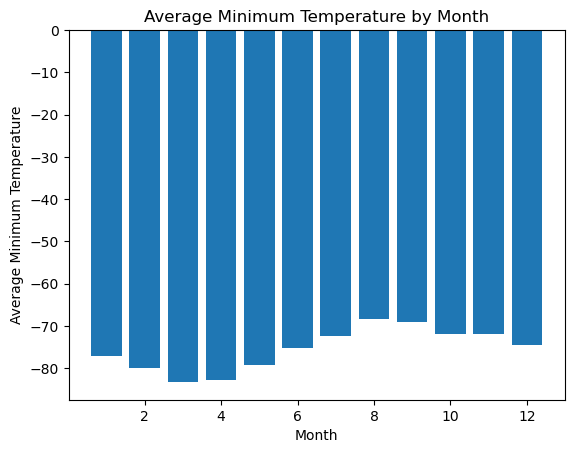

In [17]:
# Plot the average minimum temperature by month
plt.bar(average_min_temp.index, average_min_temp)
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature by Month')
plt.show()


In [18]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
cold_to_hot = df_clean.groupby('month')['min_temp'].mean()
cold_to_hot = cold_to_hot.sort_values()
cold_to_hot

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

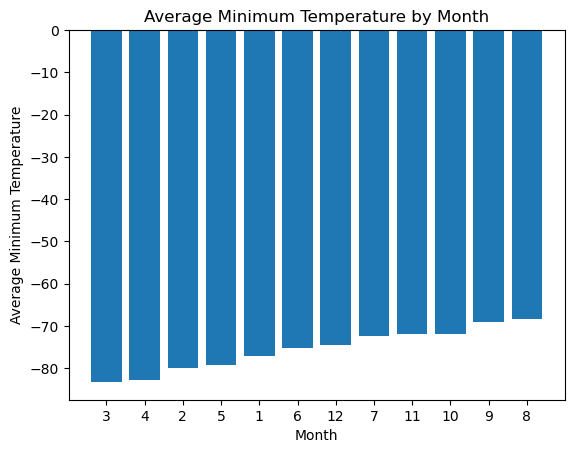

In [19]:
# Plot the coldest month to the hottest month
average_min_temp = average_min_temp.sort_values().reset_index()
plt.bar(average_min_temp['month'].astype('str'), average_min_temp['min_temp'])
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature by Month')
plt.show()

In [20]:
# 4. What is the average pressure by month?
average_pressure = df_clean.groupby('month')['pressure'].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

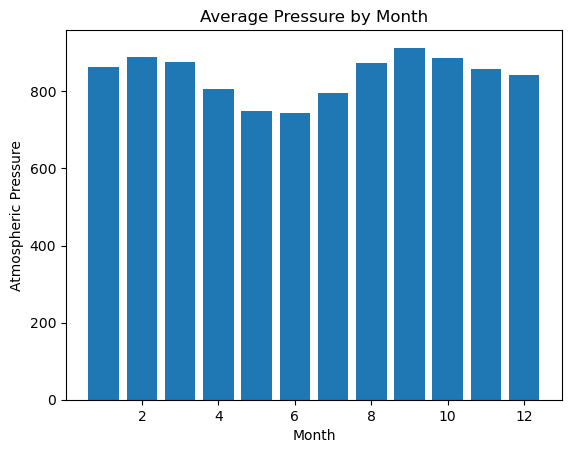

In [21]:
# Plot the average pressure by month
plt.bar(average_pressure.index, average_pressure.values)
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.show()

In [22]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
average_pressure = df_clean.groupby('month')['pressure'].mean()
average_pressure = average_pressure.sort_values()
average_pressure = pd.Series(average_pressure)
average_pressure

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

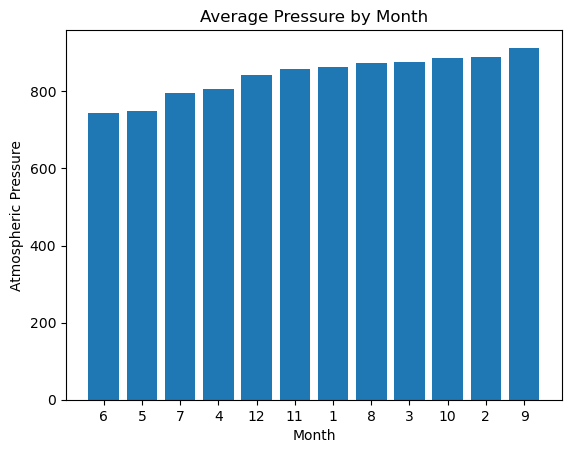

In [23]:

average_pressure = average_pressure.sort_values().reset_index()
plt.bar(average_pressure['month'].astype('str'), average_pressure['pressure'])
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.show()


The length of a Martian year is approximately 687.18 Earth days.


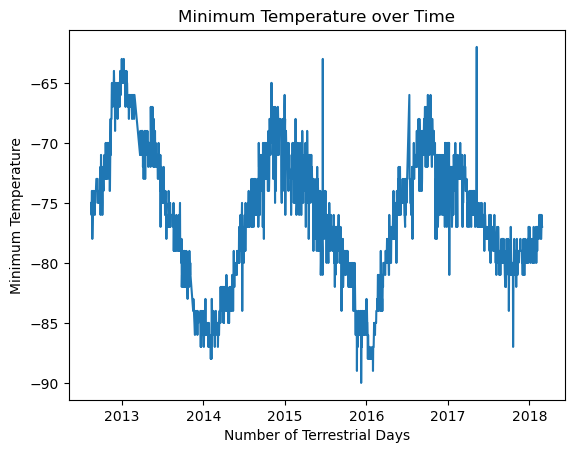

In [24]:
import math

# 5. How many terrestrial (Earth) days are there in a Martian year?
# Calculate the number of days in a Martian year
earth_year_days = 365.25
mars_semi_major_axis = 1.524  # Semi-major axis of Mars' orbit in Astronomical Units (AU)
# Kepler's Third Law: Orbital Period (T) in Earth years
mars_orbital_period_years = math.sqrt(mars_semi_major_axis**3)
# Convert Orbital Period to Earth Days
mars_orbital_period_days = mars_orbital_period_years * earth_year_days
# Output the result
print(f"The length of a Martian year is approximately {mars_orbital_period_days:.2f} Earth days.")

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(df_clean["terrestrial_date"], df_clean['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature over Time')
plt.show()

#### Minimum Temperature
I find that the bars show a consistent trend of extremely low minimum temperatures throughout the months since the average minimum temperatures appear to fluctuate between -60C and -80C, which suggests this data might be from a region with extremely cold conditions.A slight seasonal variation is visible, with higher minimun temperatures in the middle monts (pontentially summer) and the lowest temperatures as the start and end of the year (pontentially winter). On average the lowest temperature is month 3 and the highest is month 8.

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979



#### Atmospheric Pressure
In this graph some fluctuation in atmospheric pressure throughout the year, but the changes are relatively moderate and there is a dip appears slightly in the middle months (possible summer) and peak in the earlier and later months which could possibly be winter. The lower pressures during the warmer climate might align with the increased heat and lower density of air. The higher pressures during the colder months may indicate denser air in cooler conditions. The lowest atmospheric pressure is month 6 and the highest is month 9.

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970




#### Year Length
It’s fascinating to discover that Mars also has 12 months, similar to Earth. However, these months are much longer due to Mars being farther from the Sun, resulting in a year that spans 687 Earth days. This extended year aligns with the freezing temperatures shown in the graphs and data. Scientists have divided Mars’ seasons into 12 months for convenience, based on its orbital position around the Sun, rather than any natural lunar cycles like on Earth.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
df_clean.to_csv('mars_data.csv', index=False)


In [22]:
browser.quit()